In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

In [107]:
d=pd.read_csv("Admission_Predict.csv")
d

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [108]:
d.insert(9,"Admitted",d["Chance of Admit "]>=0.9)

In [109]:
d

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,False
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,False
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,False
396,397,325,107,3,3.0,3.5,9.11,1,0.84,False
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


In [110]:
d1=d.drop(columns=["Serial No.","Chance of Admit "])
d1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,True
1,324,107,4,4.0,4.5,8.87,1,False
2,316,104,3,3.0,3.5,8.00,1,False
3,322,110,3,3.5,2.5,8.67,1,False
4,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,False
396,325,107,3,3.0,3.5,9.11,1,False
397,330,116,4,5.0,4.5,9.45,1,True
398,312,103,3,3.5,4.0,8.78,0,False


In [111]:
d1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,True
1,324,107,4,4.0,4.5,8.87,1,False
2,316,104,3,3.0,3.5,8.00,1,False
3,322,110,3,3.5,2.5,8.67,1,False
4,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,False
396,325,107,3,3.0,3.5,9.11,1,False
397,330,116,4,5.0,4.5,9.45,1,True
398,312,103,3,3.5,4.0,8.78,0,False


In [112]:
d1['Admitted'].replace([True,False],[1,0],inplace=True)
d1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0
396,325,107,3,3.0,3.5,9.11,1,0
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


<Axes: xlabel='Research', ylabel='TOEFL Score'>

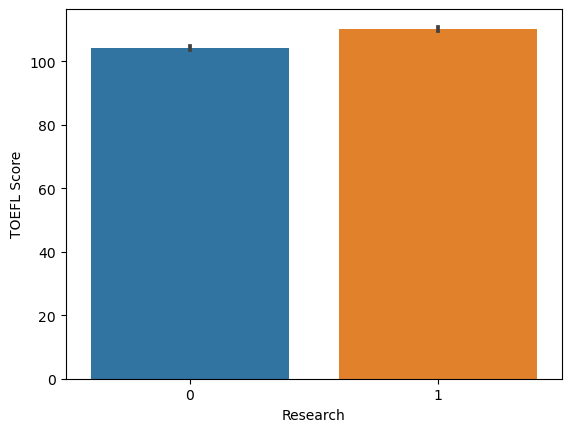

In [113]:
sns.barplot(data=d1,x="Research",y="TOEFL Score")

<Axes: xlabel='SOP', ylabel='University Rating'>

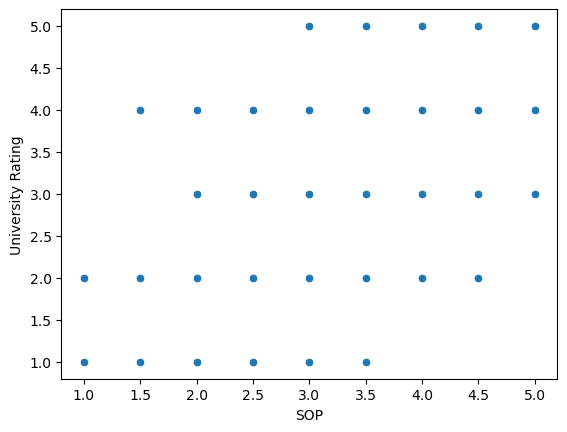

In [114]:
sns.scatterplot(data=d,x="SOP",y="University Rating")

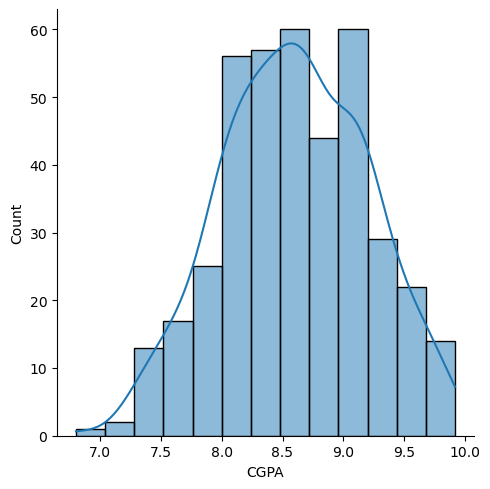

In [115]:
sns.displot(data=d,x="CGPA",kde=True)

In [116]:
from sklearn.model_selection import train_test_split as tts

In [117]:
x=d1[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]]
y=d1[["Admitted"]]

In [118]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25)

In [119]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
216,322,112,4,4.5,4.5,9.26,1
285,331,116,5,4.0,4.0,9.26,1
139,318,109,1,3.5,3.5,9.12,0
170,312,101,2,2.5,3.5,8.04,1
174,321,111,4,4.0,4.0,8.97,1


In [120]:
y_train.head()

,Admitted
216,1
285,1
139,0
170,0
174,0


In [121]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
52,334,116,4,4.0,3.0,8.00,1
374,315,105,2,2.0,2.5,7.65,0
19,303,102,3,3.5,3.0,8.50,0
338,323,108,5,4.0,4.0,8.74,1
60,309,100,2,3.0,3.0,8.10,0


In [122]:
y_test.head()

,Admitted
52,0
374,0
19,0
338,0
60,0


In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
d1=DecisionTreeClassifier(criterion="gini")

In [125]:
d1.fit(x_train,y_train)

DecisionTreeClassifier()

In [126]:
pred=d1.predict(x_test)

In [127]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [128]:
d2=pd.DataFrame({'GRE Score':[337],
                'TOEFL Score':[118],
                'University Rating':[4],
                'SOP':[4.5],
                'LOR ':[4.5],
                'CGPA':[9.65],
                'Research':[1]})

In [129]:
pre=d1.predict(d2)
if(pre==1):
    print("Admitted")
else:
    print("Not admitted")

Admitted


In [130]:
confusion_matrix(pred,y_test)

array([[89,  1],
       [ 2,  8]], dtype=int64)

In [131]:
accuracy_score(y_test,pred)

0.97

In [132]:
recall_score(y_test,pred)

0.8888888888888888

In [133]:
precision_score(y_test,pred)

0.8

In [138]:
d3=DecisionTreeClassifier(criterion='entropy')

In [139]:
d3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [140]:
d4=d3.predict(x_test)

In [141]:
d4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
d5=pd.DataFrame({'GRE Score':[337],
                'TOEFL Score':[118],
                'University Rating':[4],
                'SOP':[4.5],
                'LOR ':[4.5],
                'CGPA':[9.65],
                'Research':[1]})

In [144]:
pred1=d3.predict(d5)
if pred1==1:
    print('Admitted')
else:
    print('Not Admitted')

Admitted


In [145]:
d3.predict(d5)

array([1], dtype=int64)

[Text(0.4, 0.9, 'x[5] <= 9.155\nentropy = 0.634\nsamples = 300\nvalue = [252, 48]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 239\nvalue = [239, 0]'),
 Text(0.5, 0.7, 'x[0] <= 329.5\nentropy = 0.747\nsamples = 61\nvalue = [13, 48]'),
 Text(0.3, 0.5, 'x[1] <= 114.5\nentropy = 0.937\nsamples = 17\nvalue = [11, 6]'),
 Text(0.2, 0.3, 'x[0] <= 327.0\nentropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(0.1, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.1, '\n  (...)  \n'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.5, 'x[6] <= 0.5\nentropy = 0.267\nsamples = 44\nvalue = [2, 42]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'x[1] <= 113.5\nentropy = 0.159\nsamples = 43\nvalue = [1, 42]'),
 Text(0.7, 0.1, '\n  (...)  \n'),
 Text(0.9, 0.1, '\n  (...)  \n')]

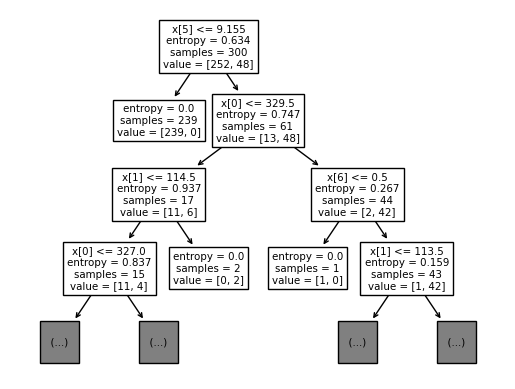

In [150]:
from sklearn import tree
tree.plot_tree(d3,max_depth=3)

[Text(0.4, 0.9, 'x[5] <= 9.155\nsamples = 300\nvalue = [252, 48]'),
 Text(0.3, 0.7, '239\n[239, 0]'),
 Text(0.5, 0.7, 'x[0] <= 329.5\n61\n[13, 48]'),
 Text(0.3, 0.5, 'x[1] <= 114.5\n17\n[11, 6]'),
 Text(0.2, 0.3, 'x[0] <= 327.0\n15\n[11, 4]'),
 Text(0.1, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.1, '\n  (...)  \n'),
 Text(0.4, 0.3, '2\n[0, 2]'),
 Text(0.7, 0.5, 'x[6] <= 0.5\n44\n[2, 42]'),
 Text(0.6, 0.3, '1\n[1, 0]'),
 Text(0.8, 0.3, 'x[1] <= 113.5\n43\n[1, 42]'),
 Text(0.7, 0.1, '\n  (...)  \n'),
 Text(0.9, 0.1, '\n  (...)  \n')]

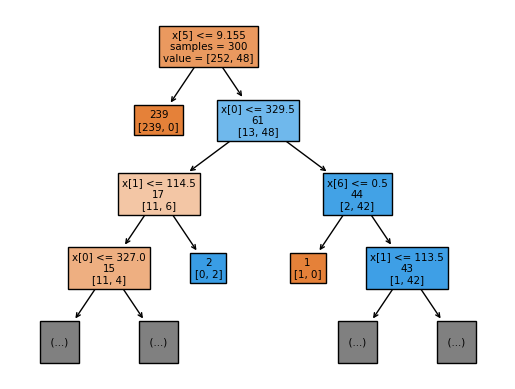

In [156]:
tree.plot_tree(d3,max_depth=3,impurity=False,filled=True,label='root')

[Text(0.4, 0.9, 'x[5] <= 9.155\nsamples = 300\nvalue = [252, 48]\nclass = y[0]'),
 Text(0.3, 0.7, 'samples = 239\nvalue = [239, 0]\nclass = y[0]'),
 Text(0.5, 0.7, 'x[0] <= 329.5\nsamples = 61\nvalue = [13, 48]\nclass = y[1]'),
 Text(0.3, 0.5, 'x[1] <= 114.5\nsamples = 17\nvalue = [11, 6]\nclass = y[0]'),
 Text(0.2, 0.3, 'x[0] <= 327.0\nsamples = 15\nvalue = [11, 4]\nclass = y[0]'),
 Text(0.1, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.1, '\n  (...)  \n'),
 Text(0.4, 0.3, 'samples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(0.7, 0.5, 'x[6] <= 0.5\nsamples = 44\nvalue = [2, 42]\nclass = y[1]'),
 Text(0.6, 0.3, 'samples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(0.8, 0.3, 'x[1] <= 113.5\nsamples = 43\nvalue = [1, 42]\nclass = y[1]'),
 Text(0.7, 0.1, '\n  (...)  \n'),
 Text(0.9, 0.1, '\n  (...)  \n')]

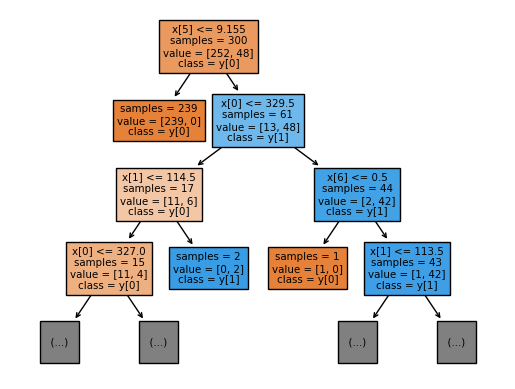

In [157]:
tree.plot_tree(d3,max_depth=3,impurity=False,filled=True,class_names=True)